In [12]:
#-*_coding:utf-8_*_
import math
from numpy import *
 
# Sigmoid函数的计算
def sigmoid(inX):
    return 1.0/(1+exp(-inX))
 
# 改进的随机梯度上升算法
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0,len(dataIndex)))
            h = sigmoid(sum(dataMatrix[randIndex]*weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha *error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights
 
 
# Logistic回归分类函数
def  classifyVetor(inX,weights):
    prob = sigmoid(sum(inX*weights))
    if prob > 0.5:
        return 1.0
    else:
        return 0.0
 
def colicTest(filetrain,filetest):
    frTrain = open(filetrain)
    frTest = open(filetest)
    trainingSet = []
    trainingLabeles = []
    for line in frTrain.readlines():
        currLine = line.strip().split('\t')
        lineArr = []
        for i in range(21):
            lineArr.append(float(currLine[i]))
        trainingSet.append(lineArr)
        trainingLabeles.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabeles,500)
    errorCount = 0
    numTestVec = 0
    for line in frTest.readlines():
        numTestVec += 1.0
        currLine = line.strip().split('\t')
        lineArr =[]
        for i in range(21):
            lineArr.append(float(currLine[i]))
        if int(classifyVetor(array(lineArr),trainWeights)) != int(currLine[21]):
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)
    print('the error rate of this test is  %f'%errorRate)
    return errorRate
 
def multTest(filetrain,filetest):
    numTests = 6
    errorSum = 1.0
    for k in range(numTests):
        errorSum += colicTest(filetrain,filetest)
    print('after %d iterations  the average error rate is %f'%(numTests,errorSum/float(numTests)))
 
 
if __name__ == '__main__':
    filetrain = 'horseColicTraining.txt'
    filetest = 'horseColicTest.txt'
    multTest(filetrain,filetest)

C:\Users\DL\AppData\Local\Temp\ipykernel_4248\2888161991.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0/(1+exp(-inX))


the error rate of this test is  0.298507
the error rate of this test is  0.388060
the error rate of this test is  0.388060
the error rate of this test is  0.388060
the error rate of this test is  0.313433
the error rate of this test is  0.343284
after 6 iterations  the average error rate is 0.519900


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
path = 'LogiReg_data.txt'
pdData = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
print(pdData.head(10))

      Exam 1     Exam 2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
5  45.083277  56.316372         0
6  61.106665  96.511426         1
7  75.024746  46.554014         1
8  76.098787  87.420570         1
9  84.432820  43.533393         1


Text(0, 0.5, 'Exam 2 Score')

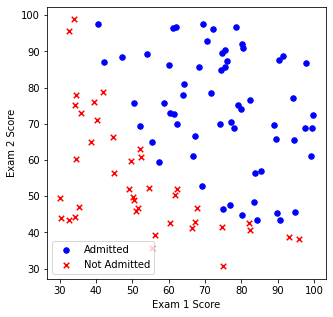

In [14]:
positive = pdData[pdData['Admitted'] == 1]
negative = pdData[pdData['Admitted'] == 0]
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=30, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=30, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

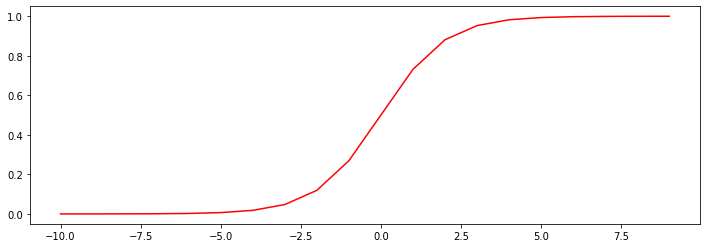

In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
 
# 如果想查看Sigmoid函数，可以运行下面代码
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(nums, sigmoid(nums), 'r')

In [16]:
# 增加一行1  在第0列
pdData.insert(0, 'Ones', 1)
print(pdData.head())
# 设置X和Y  即训练数据和训练变量
orig_data = pdData.values
cols = orig_data.shape[1]  # (100, 4)
X = orig_data[:, 0:cols-1]   # 等价于 np.matrix(X.values)
Y = orig_data[:, cols-1:cols]  # 等价于 np.matrox(data.iloc[:, 3:4].value
 
# 传递numpu矩阵 并初始化参数矩阵 theta
theta = np.zeros([1, 3])  # [[0. 0. 0.]]

   Ones     Exam 1     Exam 2  Admitted
0     1  34.623660  78.024693         0
1     1  30.286711  43.894998         0
2     1  35.847409  72.902198         0
3     1  60.182599  86.308552         1
4     1  79.032736  75.344376         1


In [17]:
def cost(X, y, theta):
    left = np.multiply(-y, np.log(model(X, theta)))
    right = np.multiply(1-y, np.log(1 - model(X, theta)))
    return np.sum(left - right) / (len(X))

In [18]:
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta)-y).ravel()
    for j in range(len(theta.ravel())):  # for each parmeter
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)
    return grad

In [19]:
# 比较三种不同梯度下降方法
STOP_ITER = 0
STOP_COST = 1
STOP_GRAD = 2
 
def stopCriterion(type, value, threshold):
    # 设定三种不同的停止策略
    if type == STOP_ITER:
        return value > threshold
    elif type == STOP_COST:
        return abs(value[-1]-value[-2]) < threshold
    elif type == STOP_GRAD:
        return np.linalg.norm(value) < threshold
 
# 洗牌
def shuffleData(data):
    np.random.shuffle(data)
    cols = data.shape[1]
    X = data[:, 0:cols-1]
    y = data[:, cols-1:]
    return X, y
 
def descent(data, theta, batchSize, stopType, thresh, alpha):
    # 梯度下降求解
    init_time = time.time()
    i = 0  # 迭代次数
    k = 0  # batch
    X, y = shuffleData(data)
    grad = np.zeros(theta.shape)  # 计算的梯度
    costs = [cost(X, y, theta)]  # 损失值
 
    while True:
        grad = gradient(X[k:k+batchSize], y[k:k+batchSize], theta)
        k += batchSize  # 取batch数量个数据
        if k>=n:
            k = 0
            X, y = shuffleData(data)  # 重新洗牌
        theta = theta = alpha*grad  # 参数更新
        costs.append(cost(X, y, theta))  # 计算新的损失
        i += 1
 
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh):
            break
    return theta, i-1, costs, grad, time.time()-init_time

In [20]:
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = 'Original' if (data[:, 1] > 2).sum() > 1 else 'Scaled'
    name += 'data - learning rate: {} -'.format(alpha)
    if batchSize == n:
        strDescType = 'Gradient'
    elif batchSize == 1:
        strDescType = 'Stochastic'
    else:
        strDescType = 'Min-batch({})'.format(batchSize)
    name += strDescType + 'descent - Stop: '
    if stopType == STOP_ITER:
        strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST:
        strStop = "costs change < {}".format(thresh)
    else:
        strStop = 'gradient norm < {}'.format(thresh)
    name += strStop
    print("***{}\nTheta: {} - Iter:{}-Last cost: {:03.2f}--Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur
    ))
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + '- Error vs. Iteration')
    return theta

In [25]:
from sklearn import datasets
from numpy import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 
 
def colicSklearn():
    iris = datasets.load_iris()
    X = iris.data
    Y = iris.target
    trainingSet,testSet,trainingLabels,testLabels = train_test_split(X,Y,test_size=0.25,random_state=40)
    classifier = LogisticRegression(solver='sag', max_iter=5000).fit(trainingSet, trainingLabels)
    test_accurcy = classifier.score(testSet, testLabels) * 100
    print("正确率为%s%%" % test_accurcy)
 
if __name__  == '__main__':
    colicSklearn()

正确率为100.0%



下面这个例子，从数据产生，到数据提取，数据标准化
模型训练和评估来说明各个API的调用过程

[0.2654328  0.29439236 0.28300308 0.26682502 0.28266791 0.28481528]
[0.45054581 0.51231759 0.48125448 0.48834837 0.51002274 0.50311622]
[[0.29208104 0.5871492  0.84830872 1.12858912 1.41854091 1.69395877]]
[10.34446774]
正确率为0.9963784017212706%


C:\Users\DL\AppData\Local\Temp\ipykernel_4248\1770151414.py:69: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b = True)


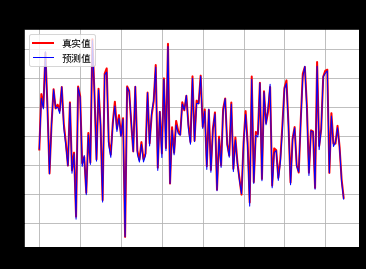

In [30]:
#_*_coding:utf-8_*_
'''
下面这个例子，从数据产生，到数据提取，数据标准化
模型训练和评估来说明各个API的调用过程
'''
print(__doc__)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
import pylab as mpl
 
# 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False
 
# 定义目标函数通过改函数产生对应的y
# y = 1 *x[0] + 2 *x[1] + ... (n+1) *x[n]
def l_model(x):
    params = np.arange(1, x.shape[-1] +1)
    y = np.sum(params *x) + np.random.randn(1) * 0.1
    return y
 
# 定义数据集
x = pd.DataFrame(np.random.rand(500,6))
# print(x)
y = x.apply(lambda x_rows:pd.Series(l_model(x_rows)),axis=1)
# print(y)
 
# 划分数据集
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=2)
 
# 数据标准化
ss = StandardScaler()
x_train_s = ss.fit_transform(x_train)
x_test_s = ss.fit_transform(x_test)
 
# 输出下元数据的标准差和平均数
print(ss.scale_)
print(ss.mean_)
 
# 训练模型
lr = LinearRegression()
lr.fit(x_train_s , y_train)
# 训练后的输入端模型系数，如果label有两个，即y值有两列，那么是一个2D的array
print(lr.coef_)
# 截距
print(lr.intercept_)
 
# 用模型预测,并计算得分
y_predict = lr.predict(x_test_s)
test_accuracy = lr.score(x_test_s, y_test)
 
print("正确率为%s%%" % test_accuracy)
 
# 预测值和实际值画图比较
t = np.arange(len(x_test_s))
# 建一个画布，facecolor是背景色
plt.figure(facecolor='black')
plt.plot(t, y_test, 'r-', linewidth= 2, label = '真实值')
plt.plot(t, y_predict, 'b-', linewidth= 1, label = '预测值')
# 显示图例，设置图例的位置
plt.legend(loc= 'upper left')
plt.title("线性回归预测真实值之间的关系", fontsize = 20)
# 加网格
plt.grid(b = True)
plt.show()